# Assignment 8: Exploratory Data Analysis and Visualization

## Instructions

1. Fill in the code where indicated to complete the assignment. Feel free to add more cells than provided to try things out, and check what your variables look like, to see if you got the right results. Just make sure you have done what is asked for that question and that you don't delete any code we provide you with.

2. Rename this `last_first_assignment8.ipynb` file replacing `last` and `first` with your name. Make sure all the outputs are there (run each cell) and then export as `last_first_assignment8.py` as well.

3. Submit thes files to Quercus.

## Questions and Support
1. Please ask class content questions on the class GitHub page: 
https://github.com/BME1478H/Fall2022class/ Expect a processing time of 1d for us to respond. As such, we cannot guarantee we can address your questions and work through all the troubleshooting in time if you ask them the night before or the day of the assignment deadline. Please plan accordingly. 
2. Attend Wednesday TA Zoom sessions 

Before we start, let's generate some example data, load in the data and import the packages we will need.  

**Run the following cells to get started and do not change any of the code**.

In [1]:
# load in our gapminder dataset
url = 'https://raw.githubusercontent.com/BME1478H/Fall2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

In [2]:
# load pre-downloaded seaborn exercise study dataset for assignment
exercise = sns.load_dataset('exercise')
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

#load gamma data from seaborn repository, from previous class github page
gammas = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/de49440879bea4d563ccefe671fd7584cba08983/gammas.csv")
gammas.head()

,timepoint,ROI,subject,BOLD signal
0,0.0,IPS,0,0.513433
1,0.0,IPS,1,-0.414368
2,0.0,IPS,2,0.214695
3,0.0,IPS,3,0.814809
4,0.0,IPS,4,-0.894992


In [4]:
`seaborn` comes with a number of pre-loaded datasets you can use to practice plotting and exploratory data analysis. You can see all the available datasets [here](https://github.com/mwaskom/seaborn-data) or by typing `sns.get_dataset_names()`. 

One dataset we will use is called `exercise` which measures pulse in subjects on either a no fat or low fat diet, at multiple time intervals while during different types of activity/exercise.

The other dataset is `gammas` which is a pre-processed dataset of fMRI (functional magnetic resonance imaging) experiments. In the dataset, we have the BOLD (blood oxygen level dependant) signal, which is used as a measure of brain activity of specific regions of interest (ROI), measured across multiple timepoints, in 19 different subjects. 
___
## Task 1 (3 marks)

a. What are the three different `ROI` (i.e. brain regions) the experimenters looked at in the `gammas` dataset? (0.5 marks)

SyntaxError: invalid syntax (3441346579.py, line 1)

In [4]:
#produce all region values without duplicates in variable unique_rois
unique_rois = gammas['ROI'].unique()


# do not change the code below, write your answer code above
print(unique_rois)

['IPS' 'AG' 'V1']


Hint: use the `unique()` method on the column you are checking.
___

b. How many unique values for `subject` are there in the study? Final answer should be one number. (0.5 marks)

In [6]:
#produce all subject values without duplicates in variable subject_values
subject_values = gammas['subject'].unique()
print(subject_values)

#use nunique to count the number of how many values (ouput one number)
no_subjects = gammas['subject'].nunique()

# do not change the code below, write your answer code above
print(no_subjects)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
20


Hint: use `unique()` as you did before, but now you want to know how many values `unique()` outputs. 
___

In [ ]:
c. In `gammas`, what is the mean, min and max of the `BOLD signal` in each `ROI`? (1 mark) 

In [7]:
#aggregate to apply mean, min, max to each ROI group, AG, IPS, V1
summary_BOLD = gammas.groupby('ROI')['BOLD signal'].agg(['mean', 'min', 'max'])

# do not change the code below, write your answer code above
print(summary_BOLD)

         mean       min       max
ROI                              
AG   1.679276 -1.695759  4.770516
IPS  0.447858 -3.611603  4.829915
V1   0.317376 -3.140057  3.507984


Hint: Split-apply-combine methods for pandas dataframes include `groupby()` to split the data and `agg()` to apply the aggregated operations (min/max/mean) when there are multiple operations you want to apply. 

Hint: `agg()` expects all the functions you want to apply to your data to be enclosed in a list. How do you denote a list in Python?

_______

d. Use seaborn to plot a `boxplot()` of the `BOLD signal` in the different `ROI`. (0.25 marks)

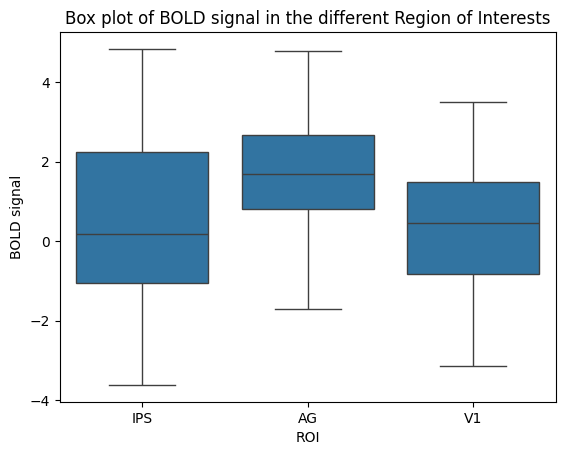

In [21]:
# create your plot here
#load gamma data from seaborn repository
gammas = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/de49440879bea4d563ccefe671fd7584cba08983/gammas.csv")
gammas.head()

#set x = ROI and y = BOLD signal to produce boxplot
sns.boxplot(x = 'ROI', y = 'BOLD signal', data = gammas)
plt.title('Box plot of BOLD signal in the different Region of Interests')
plt.show()

Hint: Did you use the correct nickname we defined for `seaborn` at the start of the notebook?

Hint: What is your independant variable (x-axis) and dependant variable (y-axis)?
____

e. The `gammas` study measures the BOLD signal across multiple timepoints so perhaps we are missing on some important patterns in the data by averaging over all the timepoints. 

What is the `mean` of the `BOLD signal` when grouping by `ROI` and `timepoint` (i.e. averaged across all patients)? (0.5 marks)

In [9]:
#group by ROI and timepoint to find mean BOLD signal
summary_BOLD_time = gammas.groupby(['ROI','timepoint'])['BOLD signal'].mean()

# do not change the code below, write your answer code above
print(summary_BOLD_time.head())

ROI  timepoint
AG   0.00000      0.717300
     0.10101      0.717339
     0.20202      0.717867
     0.30303      0.719895
     0.40404      0.724713
Name: BOLD signal, dtype: float64


Hint: `groupby()` expects the column names for splitting the dataframe to be enclosed in a list if there is more than one column given.
___

f. There are many timepoints so it is hard to tell what is going on just by looking. Use `seaborn` to plot a `lineplot()` of the `BOLD signal` (y-axis) across time given by the column `timepoint` (x-axis), where each `ROI` in the dataframe is a differently colored line. (0.25 marks)

/var/folders/w2/vj73fhl1099_48c7n3jf0mf40000gn/T/ipykernel_4684/3229400326.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x = 'timepoint', y = 'BOLD signal', hue = 'ROI', data = gammas, ci = None)


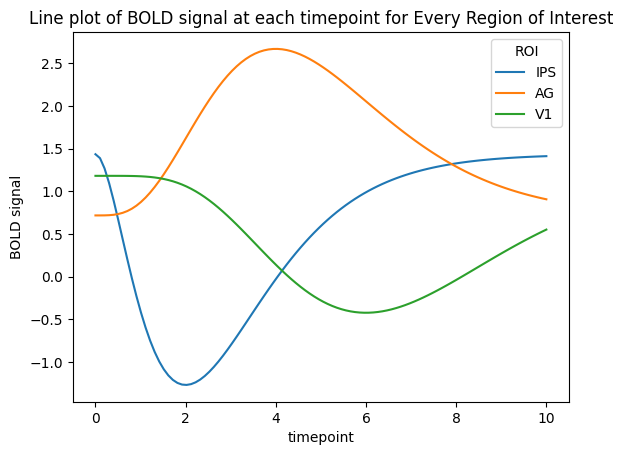

In [23]:
# create your plot here
#use x = timepoint, y = BOLD signal, hue = ROI to produce a lineplot with different colours
sns.lineplot(x = 'timepoint', y = 'BOLD signal', hue = 'ROI', data = gammas, ci = None)
plt.title('Line plot of BOLD signal at each timepoint for Every Region of Interest')
plt.show()

Hint: the `hue` parameter is available in most `seaborn` plotting functions to indicate which column to use to group the data by and separate the aggregated values for the plot by a different hue/color.
___

# Task 2 (3 marks)

In [13]:
exercise = sns.load_dataset('exercise')

# run this to inspect the exercise dataframe
print(exercise.columns)
exercise.head(2)

Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')


,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest


In [ ]:
a. Notice in the `exercise` dataset that there are is an extra column `Unnamed: 0`which is a duplicate of the index (row number). Remove the extra column from `exercise`. (0.5 marks)

In [16]:
#use iloc to find specific column based on integer position and remove Unnamed: 0 column
exercise_clean = exercise.iloc[:, 1:6]

# do not change the code below, write your answer code above
exercise_clean.head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


Hint: The `Unnamed: 0` column is the first column. Is there a way to slice the dataframe keeping all the rows but only from the second column onward? 

Alternatively, you can make use of the `dataframe.drop()` method (documentation and examples here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
___

In [ ]:
b. Using our cleaned dataset `exercise_clean` from task (a), check whether we have the same number of subjects (`id`) for each `diet` group using `nunique()`. (0.5 marks)

In [19]:
#get number of diet groups
diet_group = exercise_clean['diet'].unique()
print(diet_group)

#groupby to check number of subjects for each diet group and use nunique to count number of unique values
ids_per_diet = exercise_clean.groupby('diet')['id'].nunique()

# do not change the code below, write your answer code above
ids_per_diet

['low fat', 'no fat']
Categories (2, object): ['no fat', 'low fat']


/var/folders/w2/vj73fhl1099_48c7n3jf0mf40000gn/T/ipykernel_3264/514548800.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ids_per_diet = exercise_clean.groupby('diet')['id'].nunique()


diet
no fat     15
low fat    15
Name: id, dtype: int64

Hint: Read the docs for `nunique()` here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html?highlight=nunique#pandas.core.groupby.DataFrameGroupBy.nunique

From the documentation, we see that `nunique()` returns DataFrame with number of distinct observations per group _for each column_. 
That's fine for the purposes of this question, but if we wanted we could specify/select columns to display. 
___

c. Using `exercise_clean`, what is the average `pulse` for each of the `diet` types only in the observations taken during `rest`? Subset your data first and the final result should be in `pulse_rest` (0.5 marks)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
exercise = sns.load_dataset('exercise')

#use iloc to find specific column based on integer position and remove Unnamed: 0 column
exercise_clean = exercise.iloc[:, 1:6]

#find all values within kind equals rest
rest = exercise_clean[exercise_clean['kind'] == 'rest']
print(rest)

#groupby diet and find average pulse during rest
pulse_rest = rest.groupby('diet')['pulse'].mean()

# do not change the code below, write your answer code above
pulse_rest

    id     diet  pulse    time  kind
0    1  low fat     85   1 min  rest
1    1  low fat     85  15 min  rest
2    1  low fat     88  30 min  rest
3    2  low fat     90   1 min  rest
4    2  low fat     92  15 min  rest
5    2  low fat     93  30 min  rest
6    3  low fat     97   1 min  rest
7    3  low fat     97  15 min  rest
8    3  low fat     94  30 min  rest
9    4  low fat     80   1 min  rest
10   4  low fat     82  15 min  rest
11   4  low fat     83  30 min  rest
12   5  low fat     91   1 min  rest
13   5  low fat     92  15 min  rest
14   5  low fat     91  30 min  rest
15   6   no fat     83   1 min  rest
16   6   no fat     83  15 min  rest
17   6   no fat     84  30 min  rest
18   7   no fat     87   1 min  rest
19   7   no fat     88  15 min  rest
20   7   no fat     90  30 min  rest
21   8   no fat     92   1 min  rest
22   8   no fat     94  15 min  rest
23   8   no fat     95  30 min  rest
24   9   no fat     97   1 min  rest
25   9   no fat     99  15 min  rest
2

/var/folders/w2/vj73fhl1099_48c7n3jf0mf40000gn/T/ipykernel_4684/4004863902.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pulse_rest = rest.groupby('diet')['pulse'].mean()


diet
no fat     92.333333
low fat    89.333333
Name: pulse, dtype: float64

______
From the lesson, we saw that we could plot multiple categorical variables using `catplot()` in `seaborn`. 
Try running the following plotting code to make sense of the necessary components of `catplot()` function:

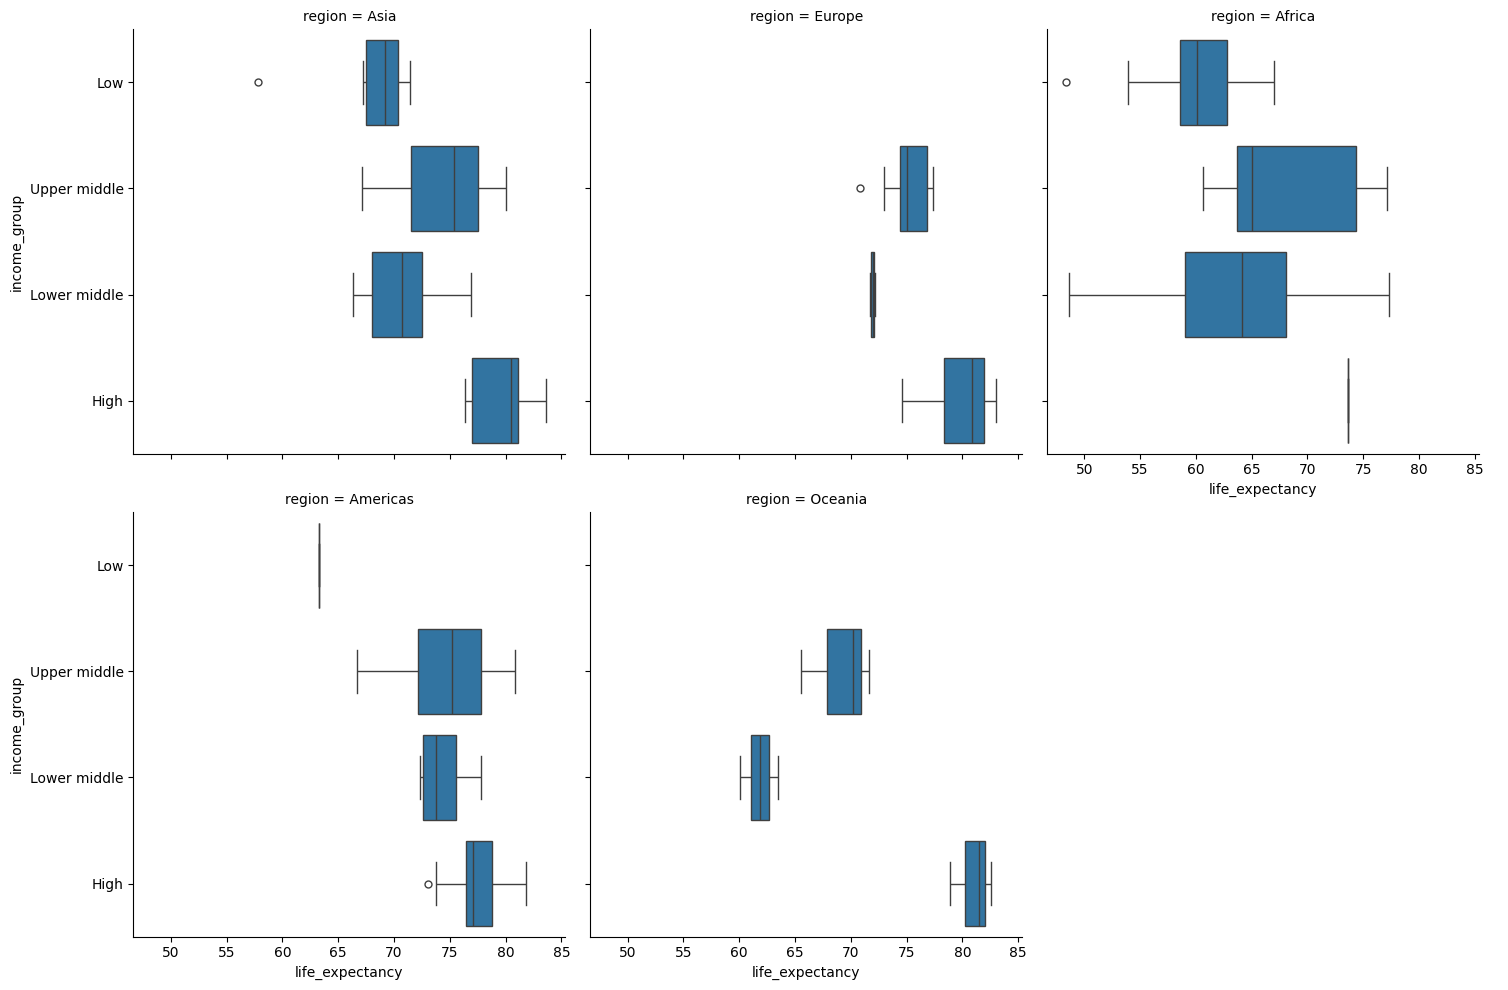

In [4]:
# load in our gapminder dataset
url = 'https://raw.githubusercontent.com/BME1478H/Fall2020class/master/data/world-data-gapminder.csv'
world_data = pd.read_csv(url)

# execute this code cell to see how catplot is used
sns.catplot(x='life_expectancy', y='income_group', data=world_data[world_data.year == 2014], kind='box',
            col='region', col_wrap=3)

d. Use the `exercise_clean` dataframe. Use `catplot()` to with `kind='point'` where:
- `time` is plotted on the x-axis and `pulse` is plotted on the `y-axis`. 
- each of the  subplots should have a different colored line for each type of `diet`
- along the column (`col`) of the catplot should be the different levels of exercise (i.e. `kind`). 

The end result should be 1 row of 3 subplots (one for each kind of exercise/activity). (0.5 marks)

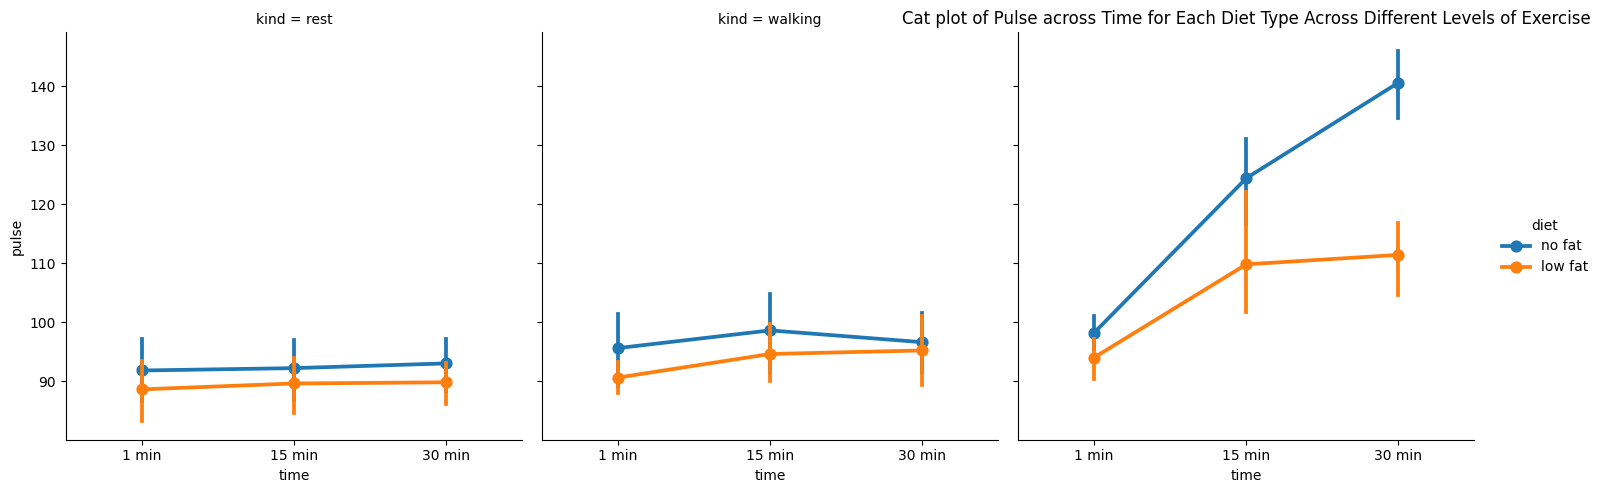

In [25]:
# create your plot here
sns.catplot(x='time', y='pulse', data=exercise_clean, kind='point',hue = 'diet', col='kind')
plt.title('Cat plot of Pulse across Time for Each Diet Type Across Different Levels of Exercise')
plt.show()

In [ ]:
___
You may notice in the plot from (d) that the difference between the pulse of subjects in the `no fat` and `low fat` diet is similar for most time durations and kinds of activity, but there is a more obvious difference between groups in the `running` condition. Let's look more closely.

e. Using only observations from the `running` group, plot a `boxplot()` of the `pulse` across subjects in the `no fat` and `low fat` `diet` groups, and for each `time` duration (there are 3 time lengths for each kind of exercise). Start by subsetting the data into a new variable. 

(0.5 marks for subsetting data, 0.5 marks for the correct plot = 1 mark total)


In [7]:
# subset your data here
#subset data into variable running
running = exercise_clean[(exercise_clean['kind'] == 'running')]
print('running')

# do not change the code below, write your answer code above
print(running.head())

running
    id     diet  pulse    time     kind
60  21  low fat     93   1 min  running
61  21  low fat     98  15 min  running
62  21  low fat    110  30 min  running
63  22  low fat     98   1 min  running
64  22  low fat    104  15 min  running


<function matplotlib.pyplot.show(close=None, block=None)>

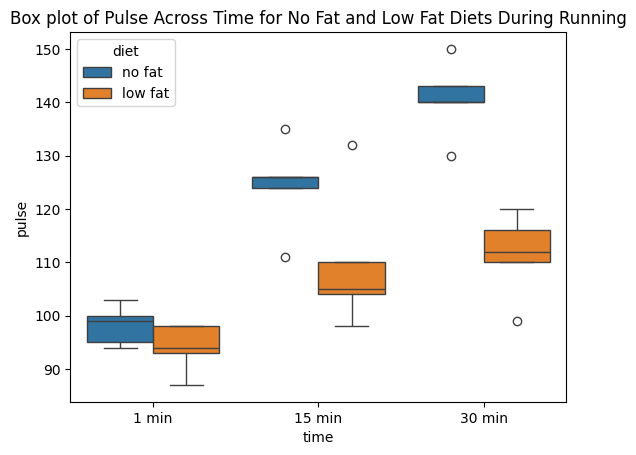

In [28]:
# create your plot here
#plot boxplot with x and y axis for running data across both diets
sns.boxplot(x='time', y='pulse', data=running, hue = 'diet')
plt.title('Box plot of Pulse Across Time for No Fat and Low Fat Diets During Running')
plt.show

## Task 3 (2 marks)

Going back to the `world_data` gapminder data, let's explore the data even more. 

a. Create a new column in `world_data` called `education_ratio` that represents the ratio between `years_in_school_women` and `years_in_school_men` (i.e. `years_in_school_men` is the denominator) (0.25 marks)

In [9]:
# create the new column here
#create column for education_ratio to express ratio between years_in_school_women and years_in_school_men'
world_data['education_ratio'] = world_data['years_in_school_women'] / world_data['years_in_school_men']
world_data[['years_in_school_men', 'years_in_school_women', 'education_ratio']]

,years_in_school_men,years_in_school_women,education_ratio
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
39196,10.9,10.0,0.917431
39197,11.1,10.2,0.918919
39198,NaN,NaN,NaN
39199,NaN,NaN,NaN


b. Display the five (5) largest `education_ratio` observations for the `year` `2010` in descending order (using `dataframe.nlargest(number, column_name)` where number is the number of observations to find) (0.25 marks)
  - the results should be limited data from the year 2010 (0.25 marks)
  - and only include the columns `country`, `year`, and `education_ratio`. (0.25 marks)
  - store the final result/subset in the variable `top_education_ratio_2010`

The answer should all be in one code cell, it is possible to do in one line but may be easier and more readable to split across more than one line. (0.75 marks total)

In [13]:
world_data['education_ratio'] = world_data['years_in_school_women'] / world_data['years_in_school_men']
world_data[['years_in_school_men', 'years_in_school_women', 'education_ratio']]
# Filter the data for the year 2010
data_2010 = world_data[world_data['year'] == 2010]

# Get the 5 largest education_ratio values and select specific columns
top_education_ratio_2010 = data_2010.nlargest(5, 'education_ratio')[['country', 'year', 'education_ratio']]

# Display the result
top_education_ratio_2010

,country,year,education_ratio
19701,Lesotho,2010,1.263087
28461,Qatar,2010,1.222766
4809,Botswana,2010,1.125714
5028,Brazil,2010,1.121328
25176,Nicaragua,2010,1.115176


Hint: Start by filtering your data to meet the required criteria. 

___
Let's compare the distribution of life expectancies in 1800 to that of 2000 in the different regions of the world. 

c. Subset your data to only include rows where the `year` is either 1800 or 2000. (0.25 marks)

In [15]:
#include rows where year is 1800 or 2000
world_1800_2000 = world_data[world_data['year'].isin([1800, 2000])]

# do not change the code below, write your answer code above
world_1800_2000.head()

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women,education_ratio
0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN,NaN
200,Afghanistan,2000,20100000,Asia,Southern Asia,Low,51.6,972,7.49,130.0,30.8,0.0385,2.90,0.59,0.203448
219,Albania,1800,410000,Europe,Southern Europe,Upper middle,35.4,667,4.60,375.0,NaN,NaN,NaN,NaN,NaN
419,Albania,2000,3120000,Europe,Southern Europe,Upper middle,74.4,5470,2.16,26.0,114.0,0.9680,9.97,9.87,0.989970
438,Algeria,1800,2500000,Africa,Northern Africa,Upper middle,28.8,715,6.99,460.0,NaN,NaN,NaN,NaN,NaN


d. Use `catplot()` to plot multiple violin plots of the `world_1800_2000` subset data where:
  - `region` is along the x-axis, `life_expectancy` is along the y-axis
  - `hue` is determined by `year`
  - `split=True` (i.e. each half of the violinplot is data from year 1800 or 2000)

(0.75 marks)

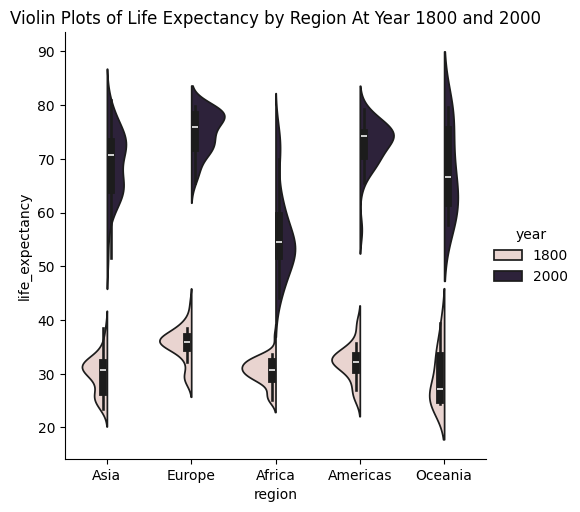

In [27]:
# create your plot here
sns.catplot(x='region', y='life_expectancy', data=world_1800_2000, kind='violin', hue = 'year', split = True)
plt.title('Violin Plots of Life Expectancy by Region At Year 1800 and 2000')
plt.show()